In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('api_metod_40k_15_fields.csv')

In [3]:
df.head()

,Title,id,price,author,publisher,pub_year,s_tile,edition_num,description,availabe,sale_date,short_pub,num_of_author,width,height
0,Learning Go,211190367,71.990000,Jon Bodner,O'Reilly Media,2024,NaN,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan 2024,1,97,150
1,Tidy First?,211127822,42.990000,Kent Beck,O'Reilly Media,2023,NaN,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct 2023,1,97,150
2,"Hands-On Machine Learning with Scikit-Learn, K...",210681725,96.990000,Aurélien Géron,O'Reilly Media,2022,NaN,(3rd ed.),"Through a recent series of breakthroughs, deep...",True,2022-10-04T00:00:00,Oct 2022,1,97,150
3,Designing Data-Intensive Applications,95729334,67.990000,Martin Kleppmann,O'Reilly Media,2017,"The Big Ideas Behind Reliable, Scalable, and M...",NaN,Data is at the center of many challenges in sy...,True,2017-03-16T00:00:00,Mar 2017,1,97,150
4,Exam Ref MS-102 Microsoft 365 Administrator,210964419,53.862731,Orin Thomas,Pearson Education,2023,NaN,NaN,Prepare for Microsoft Exam MS-102 and help dem...,True,2023-10-18T00:00:00,Oct 2023,1,97,150


In [5]:
df.columns

Index(['Title', 'id', 'price', 'author', 'publisher', 'pub_year', 's_tile',
       'edition_num', 'description', 'availabe', 'sale_date', 'short_pub',
       'num_of_author', 'width', 'height'],
      dtype='object')

## Price and publication year

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39990 entries, 0 to 39989
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          39990 non-null  object 
 1   id             39990 non-null  int64  
 2   price          39881 non-null  float64
 3   author         39981 non-null  object 
 4   publisher      39990 non-null  object 
 5   pub_year       39990 non-null  int64  
 6   s_tile         26656 non-null  object 
 7   edition_num    3613 non-null   object 
 8   description    34382 non-null  object 
 9   availabe       39990 non-null  bool   
 10  sale_date      39990 non-null  object 
 11  short_pub      39990 non-null  object 
 12  num_of_author  39990 non-null  int64  
 13  width          39990 non-null  int64  
 14  height         39990 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 4.3+ MB


In [8]:
# Handle missing values in 'price' by filling with the mean
df['price'].fillna(df['price'].mean(), inplace=True)

In [9]:
# Fill missing 'pub_year' values with the mode (most common value)
pub_year_mode = df['pub_year'].mode()[0]  # Get the most common publication year
df['pub_year'].fillna(pub_year_mode, inplace=True)

In [10]:
# Select 'price' and 'pub_year' for clustering
df_cluster = df[['price', 'pub_year']]

In [13]:
# Scale the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [14]:
# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

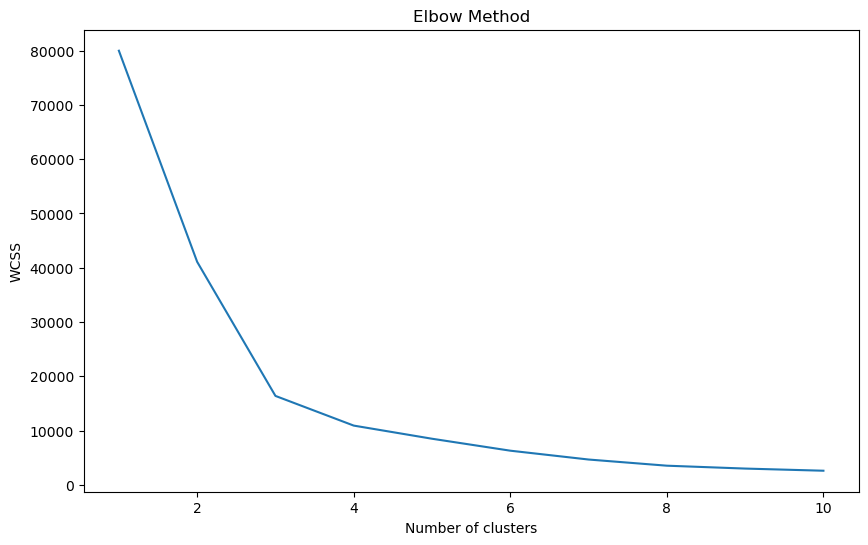

In [15]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
optimal_clusters = 3 

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(df_cluster_scaled)

/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# Silhouette Score for KMeans
silhouette_avg = silhouette_score(df_cluster_scaled, kmeans_clusters)
print(f'Silhouette Score for K-Means with {optimal_clusters} clusters:', silhouette_avg)

Silhouette Score for K-Means with 3 clusters: 0.7387207243389343


In [22]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_cluster_scaled)

In [23]:
# Add the cluster labels to the original DataFrame
df['kmeans_cluster'] = kmeans_clusters
df['dbscan_cluster'] = dbscan_clusters

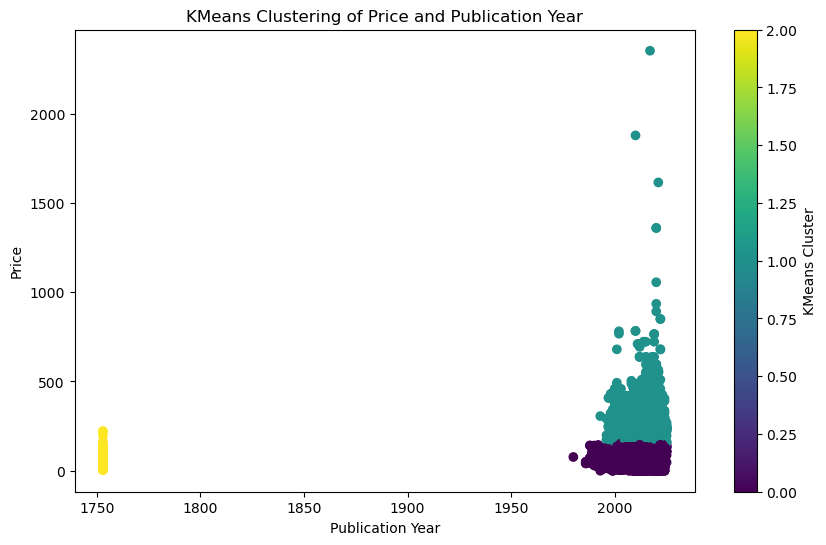

In [24]:
# Optional visualization
# KMeans Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['pub_year'], df['price'], c=df['kmeans_cluster'], cmap='viridis')
plt.title('KMeans Clustering of Price and Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Price')
plt.colorbar(label='KMeans Cluster')
plt.show()

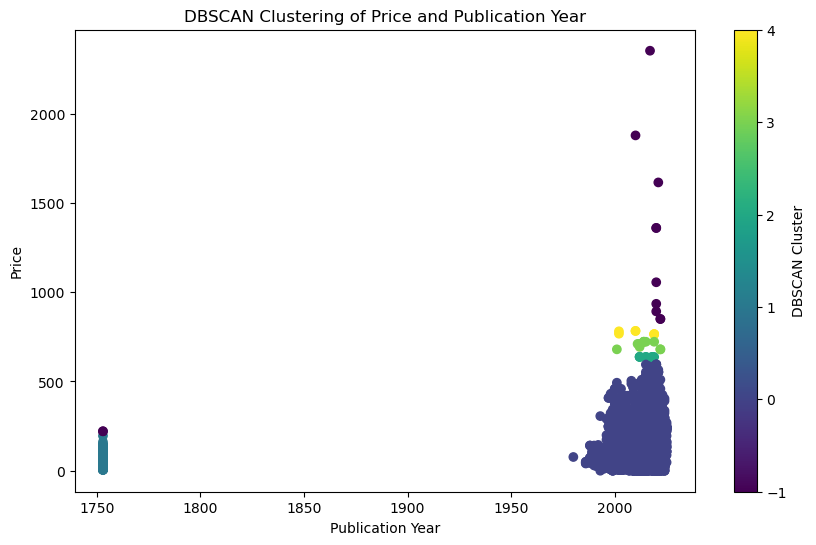

In [25]:
# DBSCAN Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['pub_year'], df['price'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of Price and Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Price')
plt.colorbar(label='DBSCAN Cluster')
plt.show()

In [ ]:
# here from both of the graph we can draw the inference that the price of books have risen
# in the recent years.

## Book edition number and price

In [53]:
 df.head()

,Title,id,price,author,publisher,pub_year,s_tile,edition_num,description,availabe,sale_date,short_pub,num_of_author,width,height,kmeans_cluster,dbscan_cluster,cluster
0,Learning Go,211190367,71.990000,Jon Bodner,O'Reilly Media,2024,NaN,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan 2024,1,97,150,0,0,0
1,Tidy First?,211127822,42.990000,Kent Beck,O'Reilly Media,2023,NaN,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct 2023,1,97,150,0,0,0
2,"Hands-On Machine Learning with Scikit-Learn, K...",210681725,96.990000,Aurélien Géron,O'Reilly Media,2022,NaN,(3rd ed.),"Through a recent series of breakthroughs, deep...",True,2022-10-04T00:00:00,Oct 2022,1,97,150,0,0,0
3,Designing Data-Intensive Applications,95729334,67.990000,Martin Kleppmann,O'Reilly Media,2017,"The Big Ideas Behind Reliable, Scalable, and M...",NaN,Data is at the center of many challenges in sy...,True,2017-03-16T00:00:00,Mar 2017,1,97,150,0,0,0
4,Exam Ref MS-102 Microsoft 365 Administrator,210964419,53.862731,Orin Thomas,Pearson Education,2023,NaN,NaN,Prepare for Microsoft Exam MS-102 and help dem...,True,2023-10-18T00:00:00,Oct 2023,1,97,150,0,0,0


In [54]:
df['edition_num'].value_counts()

edition_num
 (2nd ed.)     2100
 (3rd ed.)      677
 (4th ed.)      334
 (5th ed.)      204
 (6th ed.)      109
 (7th ed.)       70
 (8th ed.)       36
 (9th ed.)       30
 (10th ed.)      18
 (12th ed.)       8
 (11th ed.)       7
 (14th ed.)       5
 (13th ed.)       2
 (19th ed.)       2
 (57th ed.)       2
 (15th ed.)       2
 (16th ed.)       2
 (21st ed.)       2
 (22nd ed.)       1
 (18th ed.)       1
 (31st ed.)       1
Name: count, dtype: int64

In [56]:
# Extract the numeric part and convert to numeric, NaNs will be kept as NaN
df['edition_num'] = pd.to_numeric(df['edition_num'].str.extract('(\d+)')[0], errors='coerce')

In [57]:
# Select 'edition_num' and 'price' for clustering, dropping any missing values
df_cluster = df[['edition_num', 'price']].dropna()

In [58]:
# Scale the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [59]:
# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

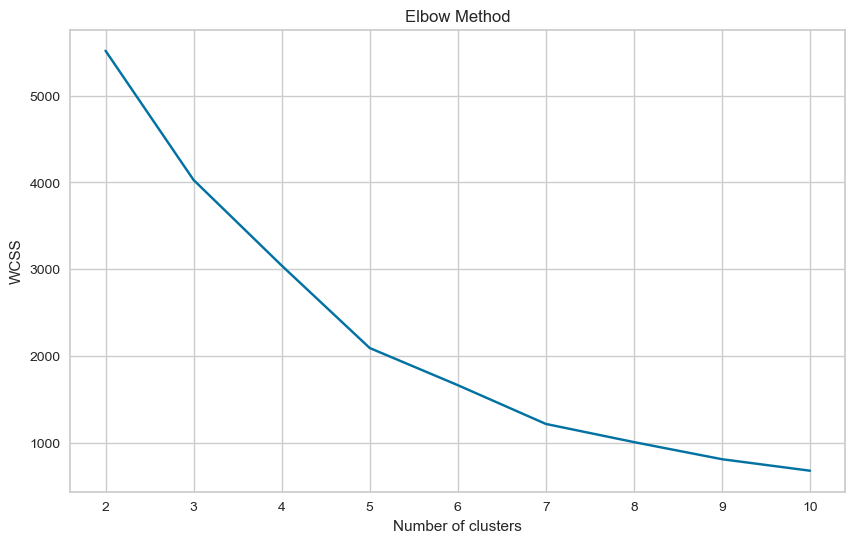

In [60]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [92]:
optimal_clusters = 3 

In [93]:
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_cluster_scaled)

/Users/prashanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
# Add cluster labels to the DataFrame that was used for clustering
df_cluster['cluster'] = clusters

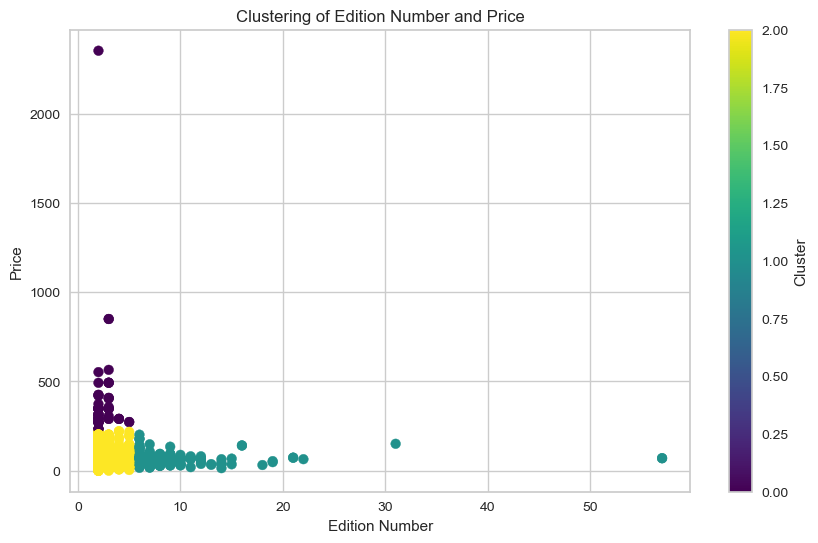

In [95]:
# Now let's plot the clusters to see how they've been assigned based on 'edition_num' and 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster['edition_num'], df_cluster['price'], c=df_cluster['cluster'], cmap='viridis')
plt.title('Clustering of Edition Number and Price')
plt.xlabel('Edition Number')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.show()

In [96]:
silhouette_avg = silhouette_score(df_cluster_scaled, clusters)
print(f'Silhouette Score for K-Means with {optimal_clusters} clusters:', silhouette_avg)

Silhouette Score for K-Means with 3 clusters: 0.6583686662462006


In [97]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(df_cluster_scaled)

In [99]:
# Add the cluster labels to the DataFrame
df_cluster['dbscan_cluster'] = clusters

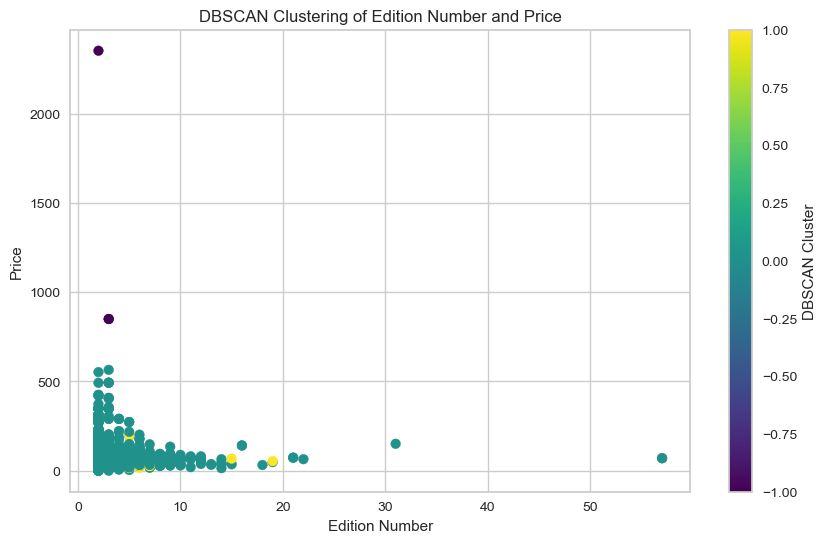

In [100]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['edition_num'], df['price'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of Edition Number and Price')
plt.xlabel('Edition Number')
plt.ylabel('Price')
plt.colorbar(label='DBSCAN Cluster')
plt.show()

In [101]:
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
noise_points = list(clusters).count(-1)

In [102]:
print(f"Number of clusters formed: {num_clusters}")
print(f"Number of noise points: {noise_points}")

Number of clusters formed: 3
Number of noise points: 24


In [ ]:
# here we observed the optimal no of clusters were 3 for the both method. and we can draw the inference that
# usally the first publication's price is high and it gradually decreases from the both clustering algorithm.